In [1]:
### 1, Data Representation in Scikit-Learn 

# 1, Data Representation in Scikit-Learn

### Get data using seaborn

In [2]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')

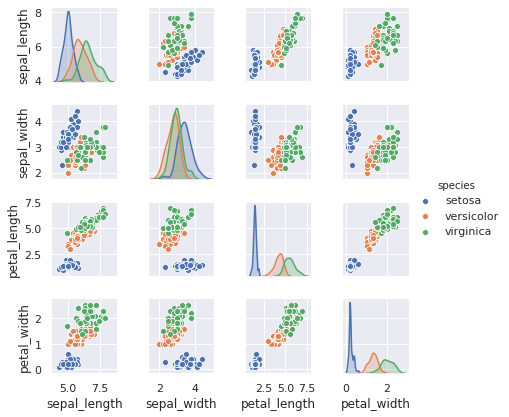

In [3]:
# view relation of each pair of feature 

%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5)

### Data can be used as a DataFrame

In [4]:
y_iris = iris['species']
X_iris = iris.drop('species', axis = 1)
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# 2, Scikit-Learn’s Estimator API

### Basic of API
1. Choose appropriate class of model 
2. Choose model parameters
3. Arrange data in feature matrix X and target vector y
4. Fit the model using fit()
5. Apply model to new data 
    + Supervised learning: predict labels for unknowm data using predict()
    + Unsupervised learning: transform or infer properties of the data using the transform() or predict() method

### Supervised learning example: Simple linear regression

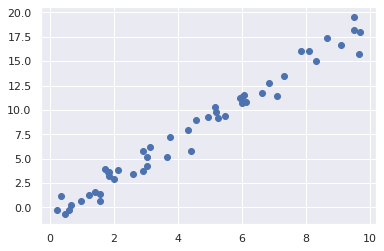

In [5]:
# create data

import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
# more linear_model here: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression 

In [7]:
# Step 1 + 2: Select model and parameter 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [8]:
# Step 3: Create feature matrix 
X = pd.DataFrame(X)
X

NameError: name 'X' is not defined

In [9]:
# Step 4: fit the model 
model.fit(X, y)

NameError: name 'X' is not defined

In [10]:
# slope: hệ số góc 
print(model.coef_)
# intercept
print(model.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [11]:
# Step5: Predict label for unknown data
xfit = np.linspace(-1, 11)
Xfit = pd.DataFrame(xfit)

yfit = model.predict(Xfit)
yfit

plt.scatter(x, y)
plt.plot(xfit, yfit)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Supervised learning example: Iris classiication 
VD sẽ sử dụng Naive Bayes vì đấy là thuật toán chạy khá nhanh, dùng để làm model ban đầu sau đó cải tiến lên những model phức tạp hơn

In [12]:
# Using Iris data from the previous section and split it into training and test data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.66, random_state = 42)

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

print(y_model, y_test)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor'] 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128  

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9607843137254902

### Unsupervised learning example: Iris dimensionality
Use PCA to for dimensional reduction

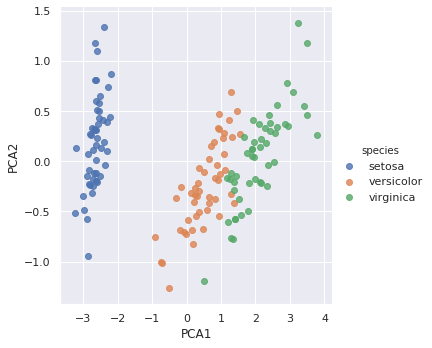

In [15]:
from sklearn.decomposition import PCA   # choose model class
model = PCA(n_components = 2)           # Instantiate the model with hyperparameters 
model.fit(X_iris)                       # fit the model 
X_2D = model.transform(X_iris)          # transform the data to two dimension

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)


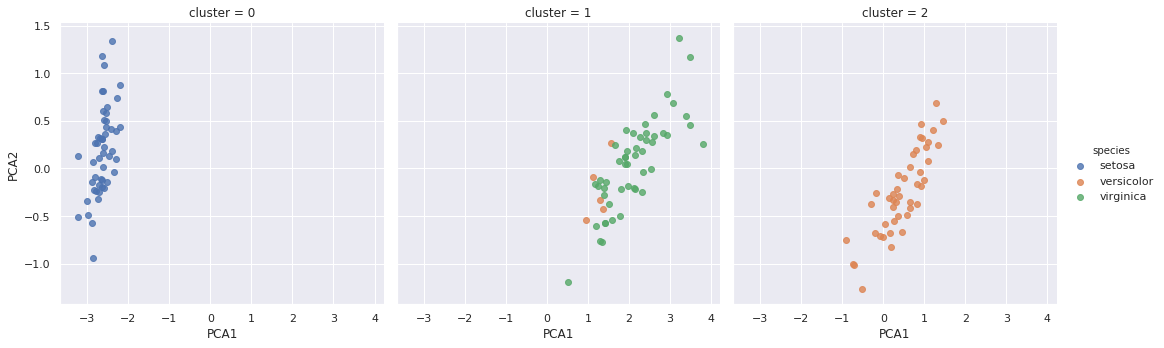

In [16]:
from sklearn.mixture import GaussianMixture
# 1. Choose the model class
model = GaussianMixture(n_components=3,
covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)
# 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)
# 4. Determine cluster labels

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False)

In [17]:
from sklearn import datasets
A, b = datasets.load_iris(return_X_y=True)
A

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3